### BRAIN TUMOR SEGMENTATION USING FEDERATED LEARNING AND ResUHybridNet
###### BASIC GIST OF THE NOTEBOOK: 
* A dataset with all the hospital nodes 
* Federated Learning implemented from scratch (as there is no exisisting libraries which has not been depricated)
* A basic server history for model updation and aggregation. 
* A few extra codes that has not been runned yet for temporal federated learning
* A ResUNetHybrid Model that combines the capacity of the ResNet Feature extractors and Segmentors of Unet 

### Importing all the necessary libraries and libraries include.
* matplotlib 
* tensorflow 
* nibabel 
* os 

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.math import confusion_matrix
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import random
import time
from json import dump, load

### SEGEMENTATION CLASSES FOR BRAIN TUMORS (Meaning tumor could be Necrotic/Core , Edema and Enhancing Tumor )

In [ ]:
 SEGMENT_CLASSES = {
    0 : 'Not Tumor',
    1 : 'Necrotic/Core', 
    2 : 'Edema',
    3 : 'Enhancing'
}


### DATA DISTRIBUTION TO FIVE HOSPITALS 
1. Data is seperated across 5 hospital Nodes
2. Ground truth Mask for Visualization

findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not

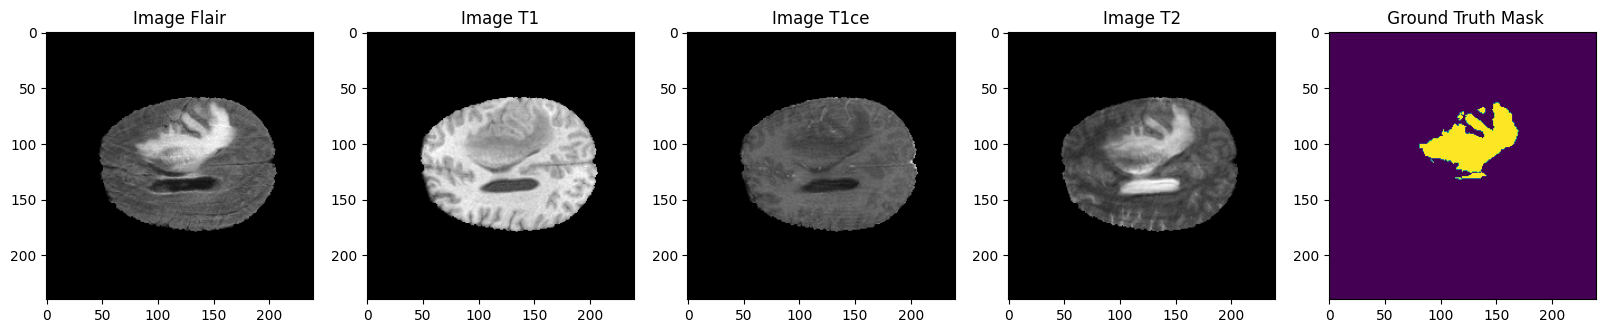

findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not

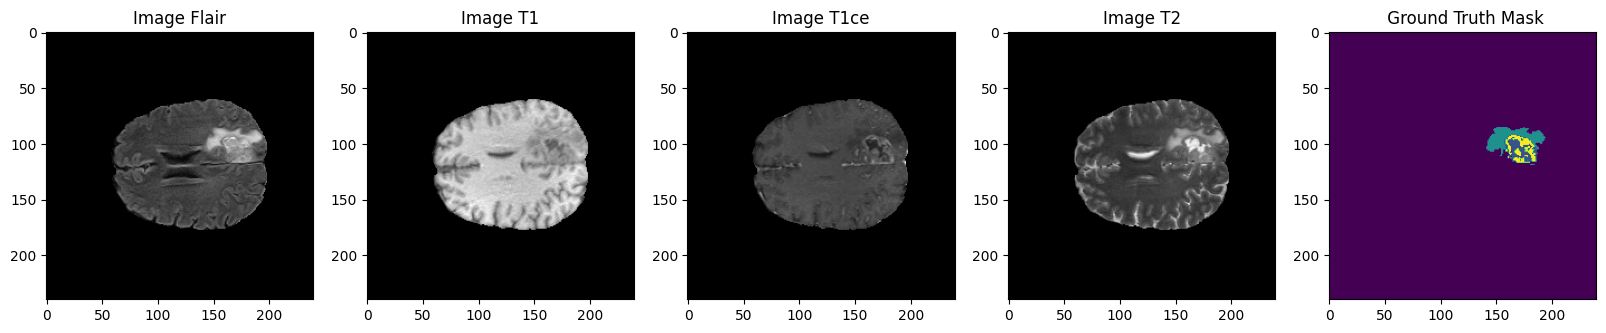

findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not

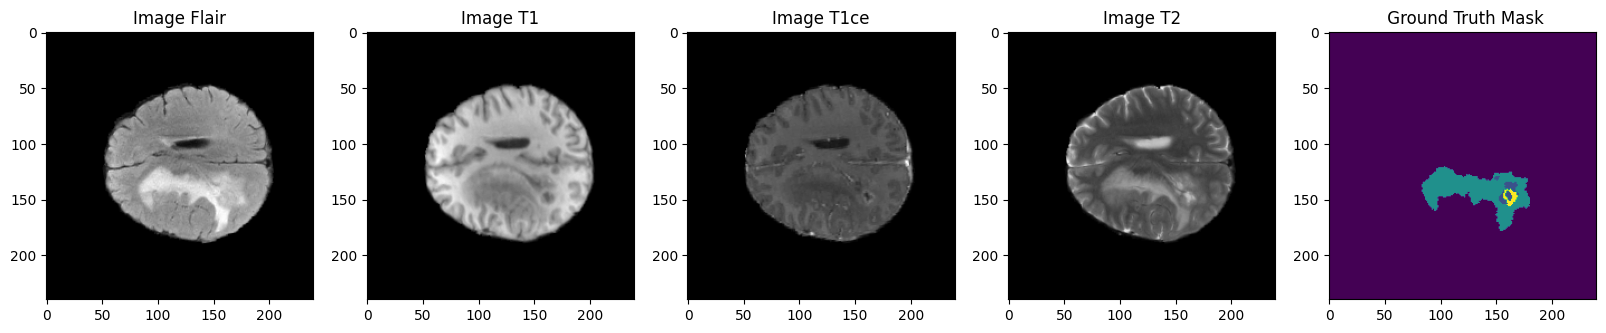

findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not

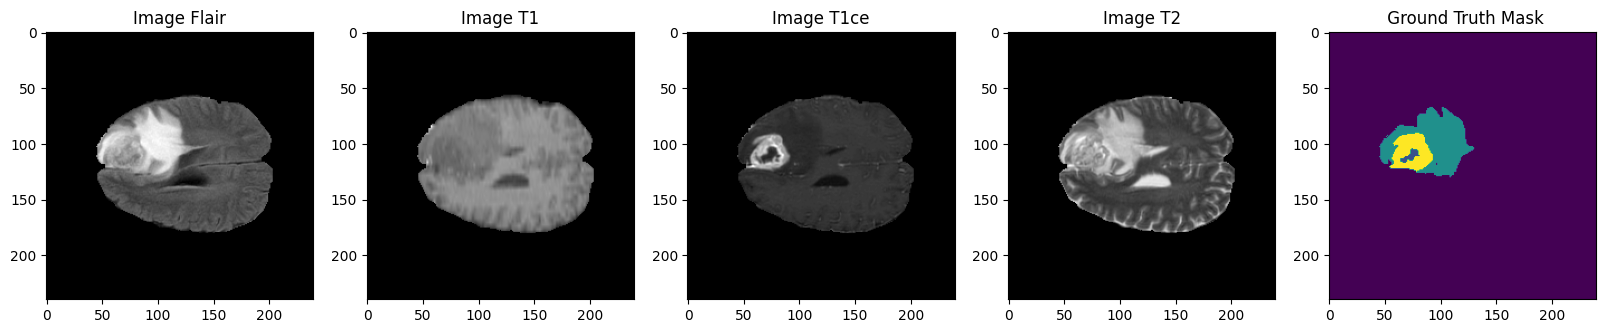

findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not

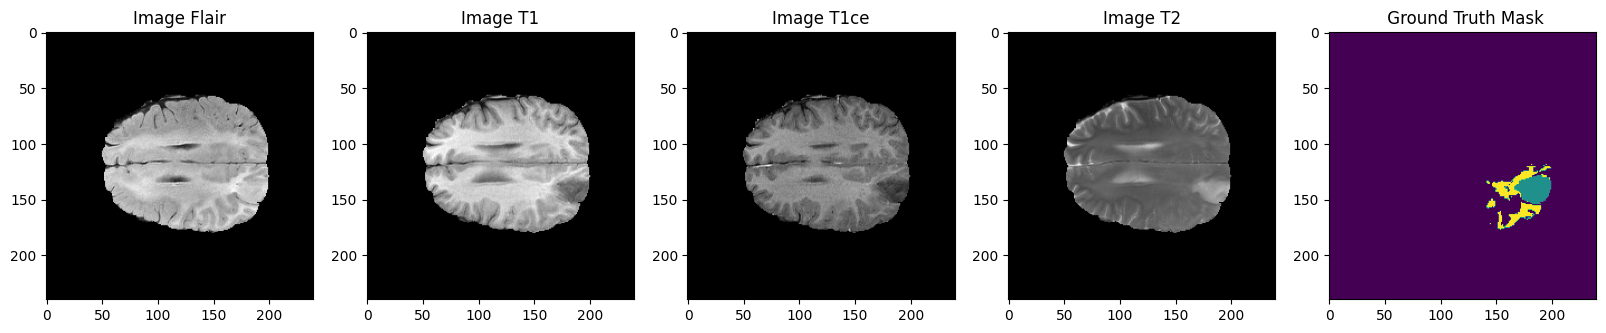

In [48]:
import nibabel as nib
import os
import matplotlib.pyplot as plt

# Define the base directory and the hospitals
BASE_DIR = "C:\\Users\\giria\\Desktop\\CODE\\"
HOSPITAL_DIRS = [os.path.join(BASE_DIR, f"HOSPITAL{i}") for i in range(1, 6)]

# Specific filenames for each hospital
FILE_NAMES = ["BraTS20_Training_001", "BraTS20_Training_076", "BraTS20_Training_149", "BraTS20_Training_223", "BraTS20_Training_297"]

# Iterate through each hospital directory and corresponding filename
for hospital_dir, file_name in zip(HOSPITAL_DIRS, FILE_NAMES):
    # Now considering the sub-folder structure
    file_prefix = os.path.join(hospital_dir, file_name, file_name)

    test_image_flair = nib.load(f"{file_prefix}_flair.nii").get_fdata()
    test_image_t1 = nib.load(f"{file_prefix}_t1.nii").get_fdata()
    test_image_t1ce = nib.load(f"{file_prefix}_t1ce.nii").get_fdata()
    test_image_t2 = nib.load(f"{file_prefix}_t2.nii").get_fdata()
    test_mask = nib.load(f"{file_prefix}_seg.nii").get_fdata()
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 10))
    slice_w = 25
    ax1.imshow(test_image_flair[:,:,test_image_flair.shape[0]//2-slice_w], cmap = 'gray')
    ax1.set_title('Image Flair')
    ax2.imshow(test_image_t1[:,:,test_image_t1.shape[0]//2-slice_w], cmap = 'gray')
    ax2.set_title('Image T1')
    ax3.imshow(test_image_t1ce[:,:,test_image_t1ce.shape[0]//2-slice_w], cmap = 'gray')
    ax3.set_title('Image T1ce')
    ax4.imshow(test_image_t2[:,:,test_image_t2.shape[0]//2-slice_w], cmap = 'gray')
    ax4.set_title('Image T2')
    ax5.imshow(test_mask[:,:,test_mask.shape[0]//2-slice_w])
    ax5.set_title(' Ground Truth Mask')
    
    # Show the plot for each hospital data
    plt.show()


In [ ]:
hospital_data = {
    "Hospital1": [f"BraTS20_Training_{i:03}" for i in range(1, 75)],
    "Hospital2": [f"BraTS20_Training_{i:03}" for i in range(76, 149)],
    "Hospital3": [f"BraTS20_Training_{i:03}" for i in range(149, 223)],
    "Hospital4": [f"BraTS20_Training_{i:03}" for i in range(223, 297)],
    "Hospital5": [f"BraTS20_Training_{i:03}" for i in range(297, 370)],
}


In [ ]:
import numpy as np
import os
import cv2
import nibabel as nib
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, UpSampling2D, BatchNormalization, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K


In [ ]:
from tensorflow.keras import backend as K

# dice loss as defined above for 4 classes
def dice_coef(y_true, y_pred, smooth=1e-5):
    class_num = 4
    
    # General Dice Coefficient
    for i in range(class_num):
        y_true_f = K.flatten(y_true[:,:,:,i])
        y_pred_f = K.flatten(y_pred[:,:,:,i])
        intersection = K.sum(y_true_f * y_pred_f)
        loss = ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))
        if i == 0:
            total_loss = loss
        else:
            total_loss = total_loss + loss
    total_loss = total_loss / class_num
    return total_loss
 

### DATA AUGMENTOR IMPLEMENTATION

In [ ]:
import numpy as np
import os
import cv2
import nibabel as nib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

IMG_SIZE = 128
VOLUME_SLICES = 100
VOLUME_START_AT = 22

BASE_PATH = "C:\\Users\\giria\\Desktop\\CODE"

# Updated path to incorporate BASE_PATH
def get_full_path(hospital_name, case_id):
    return os.path.join(BASE_PATH, hospital_name, case_id)

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, list_IDs, dim=(IMG_SIZE, IMG_SIZE), batch_size=1, n_channels=2, shuffle=True):
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()
        self.data_augmentation = ImageDataGenerator(
            zoom_range=0.3,         
            horizontal_flip=True,  
            vertical_flip=True,    
            fill_mode='nearest'     
        )

    def __len__(self):
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        Batch_ids = [self.list_IDs[k] for k in indexes]
        X, y = self.__data_generation(Batch_ids)
        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, Batch_ids):
        X = np.zeros((self.batch_size * VOLUME_SLICES, *self.dim, self.n_channels))
        y = np.zeros((self.batch_size * VOLUME_SLICES, 240, 240))
        Y = np.zeros((self.batch_size * VOLUME_SLICES, *self.dim, 4))
        
        for c, (hospital_name, i) in enumerate(Batch_ids):
            case_path = get_full_path(hospital_name, i)
            data_path = os.path.join(case_path, f'{i}_flair.nii')
            flair = nib.load(data_path).get_fdata()
            data_path = os.path.join(case_path, f'{i}_t1ce.nii')
            ce = nib.load(data_path).get_fdata()
            data_path = os.path.join(case_path, f'{i}_seg.nii')
            seg = nib.load(data_path).get_fdata()

            for j in range(VOLUME_SLICES):
                X[j + VOLUME_SLICES * c, :, :, 0] = cv2.resize(flair[:, :, j + VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))
                X[j + VOLUME_SLICES * c, :, :, 1] = cv2.resize(ce[:, :, j + VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))
                y[j + VOLUME_SLICES * c] = seg[:, :, j + VOLUME_START_AT]
                    
        y[y == 4] = 3
        mask = tf.one_hot(y, 4)
        Y = tf.image.resize(mask, (IMG_SIZE, IMG_SIZE))
        return X / np.max(X), Y




### DATA GENERATORS 

In [ ]:
import os
from sklearn.model_selection import train_test_split

hospital_data = {
    "Hospital1": [f"BraTS20_Training_{i:03}" for i in range(1, 75)],
    "Hospital2": [f"BraTS20_Training_{i:03}" for i in range(76, 149)],
    "Hospital3": [f"BraTS20_Training_{i:03}" for i in range(149, 223)],
    "Hospital4": [f"BraTS20_Training_{i:03}" for i in range(223, 297)],
    "Hospital5": [f"BraTS20_Training_{i:03}" for i in range(297, 370)],
}

def split_ids_for_hospital(hospital_name, ids):
    train_test_ids, val_ids = train_test_split(ids, test_size=0.2)
    train_ids, test_ids = train_test_split(train_test_ids, test_size=0.15)
    return ([(hospital_name, i) for i in train_ids],
            [(hospital_name, i) for i in val_ids],
            [(hospital_name, i) for i in test_ids])

all_train_ids = []
all_val_ids = []
all_test_ids = []

for hospital_name, ids in hospital_data.items():
    train_ids, val_ids, test_ids = split_ids_for_hospital(hospital_name, ids)
    all_train_ids.extend(train_ids)
    all_val_ids.extend(val_ids)
    all_test_ids.extend(test_ids)

training_generator = DataGenerator(all_train_ids)
valid_generator = DataGenerator(all_val_ids)
test_generator = DataGenerator(all_test_ids)


In [ ]:
hospital_data_generators = {}

for hospital_name, case_ids in hospital_data.items():
    generator = DataGenerator(list(zip([hospital_name]*len(case_ids), case_ids)))
    hospital_data_generators[hospital_name] = generator


In [ ]:
validation_split = 0.2

hospital_train_generators = {}
hospital_val_generators = {}

for hospital_name, case_ids in hospital_data.items():
    train_ids, val_ids = train_test_split(case_ids, test_size=validation_split, shuffle=True)
    
    train_generator = DataGenerator(list(zip([hospital_name]*len(train_ids), train_ids)))
    val_generator = DataGenerator(list(zip([hospital_name]*len(val_ids), val_ids)))
    
    hospital_train_generators[hospital_name] = train_generator
    hospital_val_generators[hospital_name] = val_generator


In [ ]:
for hospital_name, generator in hospital_train_generators.items():
    print(f"Training samples for {hospital_name}: {len(generator.list_IDs)}")
    
for hospital_name, generator in hospital_val_generators.items():
    print(f"Validation samples for {hospital_name}: {len(generator.list_IDs)}")


### ResUHybridNet Architecture

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, UpSampling2D, BatchNormalization, Activation, Add
from tensorflow.keras.regularizers import l2
import numpy as np
import tensorflow as tf

# IMAGE INPUT SHAPE
input_shape = (128, 128, 2)
n_classes = 4

# ENCODER BLOCK (RESNET STYLED BLOCK )
def resnet_block(input_tensor, filters, kernel_size=(3, 3), padding="same", stride=1):
    x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    
    if input_tensor.shape[-1] != filters or stride != 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(input_tensor)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = input_tensor
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# DECODER BLOCK(UNET STYLED BLOCKS)
def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = UpSampling2D((2, 2))(x)
    concat = concatenate([us, skip], axis=-1)
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu", kernel_regularizer=l2(1e-4))(concat)
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu", kernel_regularizer=l2(1e-4))(c)
    return c

def create_server_model():
    # INPUT LAYER
    inputs = Input(input_shape)

    # Encoder Layer with Max Pooling
    c1 = resnet_block(inputs, 64)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = resnet_block(p1, 128)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = resnet_block(p2, 256)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = resnet_block(p3, 512)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck Layer
    b = resnet_block(p4, 1024)

    # Decoder Layer
    u4 = up_block(b, c4, 512)
    u3 = up_block(u4, c3, 256)
    u2 = up_block(u3, c2, 128)
    u1 = up_block(u2, c1, 64)

    # Output layer
    outputs = Conv2D(n_classes, (1, 1), activation="softmax")(u1)
    model = Model(inputs, outputs)
    model.compile(loss="categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                      metrics=['accuracy'])  
    # Note: For brevity, I've only included 'accuracy' in metrics. You can add back the other metrics.
    
    return model



In [ ]:
# Instantiate the server model
server_model = create_server_model()
server_model.summary()


In [ ]:
import os

def is_sample_complete(sample_id, required_files=['flair_ni', 't1ce_ni', 't2_ni', 't1_ni', 'seg_ni']):
    """
    Check if the necessary files are present for a given sample.

    :param sample_id: The ID of the sample.
    :param required_files: List of files that need to be present.
    :return: True if all files are present, False otherwise.
    """
    for required_file in required_files:
        # Check if each file exists in the given data path
        if not os.path.exists(os.path.join("Hospital5", sample_id, required_file)):
            return False

    return True

# Check for each sample in Hospital5:
incomplete_samples = []

for sample_id in hospital_data["Hospital5"]:
    if not is_sample_complete(sample_id):
        print(f"Data incomplete for sample {sample_id} in Hospital5.")
        incomplete_samples.append(sample_id)

# Remove incomplete samples from Hospital5 data
for sample_id in incomplete_samples:
    hospital_data["Hospital5"].remove(sample_id)


In [ ]:
# Filter out the incomplete samples
hospital_data["Hospital5"] = [sample_id for sample_id in hospital_data["Hospital5"] if is_sample_complete(sample_id)]

# Count the number of complete samples in Hospital5
complete_samples_count = len(hospital_data["Hospital5"])

print(f"Number of complete samples in Hospital5 after removing incomplete ones: {complete_samples_count}")


### FEDERATED TRAINING LOOP : 
1. The code uses Horizontal Federated Learning.
2. The averaging method used is Federated Averaging.

In [ ]:
import numpy as np
import time
import random

# Define parameters
NUM_CLIENTS = len(hospital_data)  # Number of hospitals (clients)
NUM_ROUNDS = 100

# Create a list to hold client models for each hospital
client_models = [create_server_model() for _ in range(NUM_CLIENTS)]
arr = []
serverhist = {
    "loss": [],
    "accuracy": [],
    "mean_iou": [],
    "dice_coef": []
}

# Create and compile the server model
server_model = create_server_model()
server_model.compile(optimizer=tf.keras.optimizers.Adam(),
                     loss='categorical_crossentropy',
                     metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=4), dice_coef])

for round_num in range(NUM_ROUNDS):
    print(f"----- ROUND {round_num} -----")
    round_start_time = time.time()
    client_weights = []

    for client_num, (hospital_name, client_model) in enumerate(zip(hospital_data.keys(), client_models)):
        start_time = time.time()

        # Training the model using the hospital's train generator
        client_model.fit(hospital_train_generators[hospital_name], epochs=1, verbose=1)

        client_weights.append(client_model.get_weights())  # Store the weights

        # Capture the training time
        elapsed_time = time.time() - start_time
        arr.append(elapsed_time)

    # Federated Averaging: Compute the average of the client models' weights
    avg_weights = [np.mean([client_weights[j][i] for j in range(NUM_CLIENTS)], axis=0) for i in range(len(client_weights[0]))]
    server_model.set_weights(avg_weights)

    # Evaluate the server model on the validation data of all hospitals
    total_val_samples = sum([len(generator.list_IDs) for generator in hospital_val_generators.values()])
    val_loss, val_accuracy, val_mean_iou, val_dice_coef = 0, 0, 0, 0

    for generator in hospital_val_generators.values():
        metrics = server_model.evaluate(generator, verbose=1)
        num_samples = len(generator.list_IDs)
        val_loss += metrics[0] * num_samples
        val_accuracy += metrics[1] * num_samples
        val_mean_iou += metrics[2] * num_samples
        val_dice_coef += metrics[3] * num_samples   

    # Averaging the metrics across all validation samples
    val_loss /= total_val_samples
    val_accuracy /= total_val_samples
    val_mean_iou /= total_val_samples
    val_dice_coef /= total_val_samples

    serverhist["loss"].append(val_loss)
    serverhist["accuracy"].append(val_accuracy)
    serverhist["mean_iou"].append(val_mean_iou)
    serverhist["dice_coef"].append(val_dice_coef)
    serverhist["time_taken"].append(time.time() - round_start_time)


### SAVING SERVER LOGS IN A JSON FILE 

In [40]:
with open("variables/generated_data.json", "w") as f:
    dump(serverhist, f, indent=4)